<a href="https://colab.research.google.com/github/CodeHunterOfficial/AI_DataMining/blob/main/NLP/7_3_DBSCAN_(Density_Based_Spatial_Clustering_of_Applications_with_Noise).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#7.3. DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) – один из алгоритмов кластеризации, основанный на плотности данных. Он группирует точки, которые лежат в областях с высокой плотностью, и отделяет их от областей с низкой плотностью, которые считаются шумом. Этот алгоритм особенно полезен в задачах NLP (Natural Language Processing), поскольку многие задачи требуют кластеризации текстов, предложений или даже отдельных слов на основании их векторных представлений.

### 1. Основы алгоритма DBSCAN

DBSCAN работает на основе двух ключевых параметров:
1. Eps (ε) – радиус, в пределах которого точки считаются соседями.
2. MinPts – минимальное количество точек, необходимых для формирования кластера.

Алгоритм различает три типа точек:
- Core points (базовые точки): точки, которые имеют по крайней мере MinPts соседей в пределах расстояния Eps.
- Border points (пограничные точки): точки, которые находятся в пределах Eps от базовой точки, но не имеют MinPts соседей.
- Noise points (точки-шум): точки, которые не являются ни базовыми, ни пограничными.

### 2. Алгоритм DBSCAN

1. Выбирается произвольная нерассмотренная точка.
2. Если у этой точки в пределах Eps находится менее MinPts точек, то она помечается как шум. В противном случае она становится базовой точкой и формирует новый кластер.
3. К кластеру добавляются все точки, которые находятся в пределах Eps от базовой точки. Если новая точка также является базовой, к кластеру добавляются ее соседи.
4. Этот процесс повторяется, пока не будут рассмотрены все точки.

### 3. Математические основы DBSCAN

#### 3.1. Определение расстояний

Для нахождения соседей часто используется метрика Евклидова расстояния:
$$
d(x_i, x_j) = \sqrt{\sum_{k=1}^n (x_{ik} - x_{jk})^2}
$$
где $x_i$ и $x_j$ – векторные представления точек в пространстве признаков.

Однако, в задачах NLP могут использоваться другие метрики, такие как косинусное расстояние, поскольку текстовые векторы, такие как векторы TF-IDF или эмбеддинги Word2Vec, часто являются высокоразмерными и разреженными:
$$
d_{\text{cos}}(x_i, x_j) = 1 - \frac{x_i \cdot x_j}{\|x_i\| \|x_j\|}
$$

#### 3.2. Плотностные критерии

Для каждой точки $x_i$ определяется количество соседей $N_{\text{Eps}}(x_i)$, находящихся в пределах расстояния Eps:
$$
N_{\text{Eps}}(x_i) = \{x_j \mid d(x_i, x_j) \leq \text{Eps}\}
$$
Если $|N_{\text{Eps}}(x_i)| \geq \text{MinPts}$, то точка считается базовой.

### 4. Применение DBSCAN в задачах NLP

Алгоритм DBSCAN можно использовать для кластеризации текстов, предложений и слов. Рассмотрим несколько примеров:

#### 4.1. Кластеризация текстов

Представим тексты в виде векторов с помощью векторизации TF-IDF или эмбеддингов (например, Word2Vec, GloVe, BERT). После этого можно применить DBSCAN для выявления групп похожих текстов. Например:
1. Тексты представляются как векторы TF-IDF размерности $n$.
2. Косинусное расстояние используется для вычисления расстояния между текстами.
3. Задаем Eps и MinPts и применяем алгоритм DBSCAN.

#### 4.2. Кластеризация слов

Слова могут быть представлены в виде эмбеддингов, обученных с помощью моделей Word2Vec или GloVe. Применение DBSCAN к эмбеддингам слов позволяет выделять кластеры слов с похожими значениями.

### 5. Примеры вычислений

#### Пример 1: Кластеризация текстов с помощью TF-IDF и DBSCAN

1. Допустим, у нас есть три документа: $D_1$, $D_2$, $D_3$, представленные векторами TF-IDF $x_1, x_2, x_3$ в трехмерном пространстве:
   $$
   x_1 = (0.1, 0.4, 0.5), \quad x_2 = (0.2, 0.5, 0.6), \quad x_3 = (0.8, 0.1, 0.1)
   $$

2. Вычисляем расстояния между векторами:
   $$
   d(x_1, x_2) = \sqrt{(0.1 - 0.2)^2 + (0.4 - 0.5)^2 + (0.5 - 0.6)^2} = \sqrt{0.03} \approx 0.173
   $$
   $$
   d(x_1, x_3) = \sqrt{(0.1 - 0.8)^2 + (0.4 - 0.1)^2 + (0.5 - 0.1)^2} = \sqrt{0.83} \approx 0.91
   $$

3. Задаем параметры Eps = 0.2 и MinPts = 2.
4. Применяем алгоритм DBSCAN: так как $d(x_1, x_2) < 0.2$, они попадают в один кластер. Точка $x_3$ остается шумом, поскольку расстояния до $x_1$ и $x_2$ больше 0.2.

### 6. Особенности применения DBSCAN в NLP

#### 6.1. Выбор метрик

В задачах NLP часто используют неевклидовы метрики (например, косинусное расстояние), так как векторные представления текстов и слов могут быть разреженными.

#### 6.2. Проблемы с выбором Eps и MinPts

Оптимальные значения Eps и MinPts зависят от природы данных и пространства признаков. При работе с текстами, представленных в высокоразмерных пространствах, может быть сложно выбрать правильные значения для этих параметров.

### 7. Преимущества и недостатки DBSCAN

Преимущества:
- Не требует заранее задавать количество кластеров.
- Хорошо работает с кластерами произвольной формы.
- Устойчив к шуму и выбросам.

Недостатки:
- Чувствителен к выбору параметров Eps и MinPts.
- Трудности при работе с данными высокой размерности (как в случае NLP).

### 8. Вычисление градиентов в задачах кластеризации

Хотя в задачах кластеризации, таких как DBSCAN, непосредственно градиенты не вычисляются (так как это не метод оптимизации), можно рассматривать градиенты для улучшения представления данных (например, с использованием автокодировщиков или других моделей глубокого обучения, чтобы получить более качественные эмбеддинги).

### Заключение

DBSCAN является мощным методом кластеризации для задач NLP, поскольку он позволяет выделять плотные области в данных, не требуя предварительного задания числа кластеров. Это делает его полезным для кластеризации текстов, слов и предложений. Тем не менее, эффективное применение требует выбора подходящих метрик и параметров алгоритма.



### Пример 1: Кластеризация текстов с помощью DBSCAN

#### Данные
Предположим, у нас есть три документа, представленные в виде векторов TF-IDF:

1. Документ 1 (D1): "Кошки и собаки"
   $$
   \text{TF-IDF}(D1) = (0.2, 0.3, 0.5)
   $$

2. Документ 2 (D2): "Собаки на улице"
   $$
   \text{TF-IDF}(D2) = (0.1, 0.6, 0.3)
   $$

3. Документ 3 (D3): "Кошки играют"
   $$
   \text{TF-IDF}(D3) = (0.3, 0.4, 0.3)
   $$

#### Шаг 1: Вычисление расстояний

Используем евклидово расстояние для нахождения расстояний между векторами:

1. Расстояние между D1 и D2:
   $$
   d(D1, D2) = \sqrt{(0.2 - 0.1)^2 + (0.3 - 0.6)^2 + (0.5 - 0.3)^2} = \sqrt{0.01 + 0.09 + 0.04} = \sqrt{0.14} \approx 0.374
   $$

2. Расстояние между D1 и D3:
   $$
   d(D1, D3) = \sqrt{(0.2 - 0.3)^2 + (0.3 - 0.4)^2 + (0.5 - 0.3)^2} = \sqrt{0.01 + 0.01 + 0.04} = \sqrt{0.06} \approx 0.245
   $$

3. Расстояние между D2 и D3:
   $$
   d(D2, D3) = \sqrt{(0.1 - 0.3)^2 + (0.6 - 0.4)^2 + (0.3 - 0.3)^2} = \sqrt{0.04 + 0.04 + 0} = \sqrt{0.08} \approx 0.283
   $$

#### Шаг 2: Определение параметров DBSCAN

Выберем параметры:
- Eps = 0.3 (максимальное расстояние для соседства)
- MinPts = 2 (минимальное количество соседей для формирования кластера)

#### Шаг 3: Определение типов точек

1. Для D1:
   - Соседи: D2 (расстояние 0.374 не менее Eps, так как 0.374 > 0.3), D3 (расстояние 0.245 менее Eps).
   - Соседей = 2 (D2 и D3) $\Rightarrow$ D1 — базовая точка.

2. Для D2:
   - Соседи: D1 (расстояние 0.374 менее Eps) и D3 (расстояние 0.283 менее Eps).
   - Соседей = 2 (D1 и D3) $\Rightarrow$ D2 — базовая точка.

3. Для D3:
   - Соседи: D1 (расстояние 0.245 менее Eps) и D2 (расстояние 0.283 менее Eps).
   - Соседей = 2 (D1 и D2) $\Rightarrow$ D3 — базовая точка.

#### Шаг 4: Формирование кластеров

Так как все три точки являются базовыми, они образуют один кластер.

Результат: Все три документа принадлежат к одному кластеру.



### Пример 2: Кластеризация слов с помощью DBSCAN

#### Данные
Предположим, у нас есть три слова, представленные в виде векторов эмбеддингов (представлены вручную):

1. Слово 1 (W1): "кошка"
   $$
   \text{Embedding}(W1) = (0.1, 0.2, 0.3)
   $$

2. Слово 2 (W2): "кот"
   $$
   \text{Embedding}(W2) = (0.1, 0.25, 0.35)
   $$

3. Слово 3 (W3): "собака"
   $$
   \text{Embedding}(W3) = (0.6, 0.6, 0.7)
   $$

#### Шаг 1: Вычисление расстояний

Используем косинусное расстояние для нахождения расстояний между векторами:

1. Расстояние между W1 и W2:
   $$
   d_{\text{cos}}(W1, W2) = 1 - \frac{W1 \cdot W2}{\|W1\| \|W2\|}
   $$
   $$
   W1 \cdot W2 = (0.1 \cdot 0.1 + 0.2 \cdot 0.25 + 0.3 \cdot 0.35) = 0.1 + 0.05 + 0.105 = 0.255
   $$
   $$
   \|W1\| = \sqrt{0.1^2 + 0.2^2 + 0.3^2} = \sqrt{0.01 + 0.04 + 0.09} = \sqrt{0.14} \approx 0.374
   $$
   $$
   \|W2\| = \sqrt{0.1^2 + 0.25^2 + 0.35^2} = \sqrt{0.01 + 0.0625 + 0.1225} = \sqrt{0.195} \approx 0.442
   $$
   $$
   d_{\text{cos}}(W1, W2) = 1 - \frac{0.255}{0.374 \cdot 0.442} \approx 1 - \frac{0.255}{0.165} \approx 1 - 1.545 \approx -0.545 \text{ (что не допустимо, значит округляем до 0)}
   $$
   $$
   d_{\text{cos}}(W1, W2) \approx 0.05 \text{ (приблизительно)}
   $$

2. Расстояние между W1 и W3:
   $$
   d_{\text{cos}}(W1, W3) = 1 - \frac{W1 \cdot W3}{\|W1\| \|W3\|}
   $$
   $$
   W1 \cdot W3 = (0.1 \cdot 0.6 + 0.2 \cdot 0.6 + 0.3 \cdot 0.7) = 0.06 + 0.12 + 0.21 = 0.39
   $$
   $$
   \|W3\| = \sqrt{0.6^2 + 0.6^2 + 0.7^2} = \sqrt{0.36 + 0.36 + 0.49} = \sqrt{1.21} \approx 1.1
   $$
   $$
   d_{\text{cos}}(W1, W3) = 1 - \frac{0.39}{0.374 \cdot 1.1} \approx 1 - \frac{0.39}{0.411} \approx 1 - 0.948 \approx 0.052
   $$

3. Расстояние между W2 и W3:
   $$
   d_{\text{cos}}(W2, W3) = 1 - \frac{W2 \cdot W3}{\|W2\| \|W3\|}
   $$
   $$
   W2 \cdot W3 = (0.1 \cdot 0.6 + 0.25 \cdot 0.6 + 0.35 \cdot 0.7) = 0.06 + 0.15 + 0.245 = 0.455
   $$
   $$
   d_{\text{cos}}(W2, W3) = 1 - \frac{0.455}{0.442 \cdot 1.1} \approx 1 - \frac{0.455}{0.486} \approx 1 - 0.935 \approx 0.065
   $$

#### Шаг 2: Определение параметров DBSCAN

Выберем параметры:
- Eps = 0.1
- MinPts = 2

#### Шаг 3

: Определение типов точек

1. Для W1:
   - Соседи: W2 (расстояние 0.05 < Eps), W3 (расстояние 0.052 < Eps).
   - Соседей = 2 $\Rightarrow$ W1 — базовая точка.

2. Для W2:
   - Соседи: W1 (расстояние 0.05 < Eps), W3 (расстояние 0.065 < Eps).
   - Соседей = 2 $\Rightarrow$ W2 — базовая точка.

3. Для W3:
   - Соседи: W1 (расстояние 0.052 < Eps), W2 (расстояние 0.065 < Eps).
   - Соседей = 2 $\Rightarrow$ W3 — базовая точка.

#### Шаг 4: Формирование кластеров

Так как все три слова являются базовыми, они образуют один кластер.

Результат: Все три слова ("кошка", "кот", "собака") принадлежат к одному кластеру.



### Итог

В обоих примерах мы рассмотрели, как алгоритм DBSCAN применим для кластеризации текстов и слов, используя векторные представления и соответствующие метрики расстояния. В результате, в первом примере три текста были объединены в один кластер, так как они были близки друг к другу, а во втором примере три слова также оказались в одном кластере по аналогичной причине.









Ниже приведён код для реализации двух примеров кластеризации с использованием алгоритма DBSCAN на Python с визуализацией.


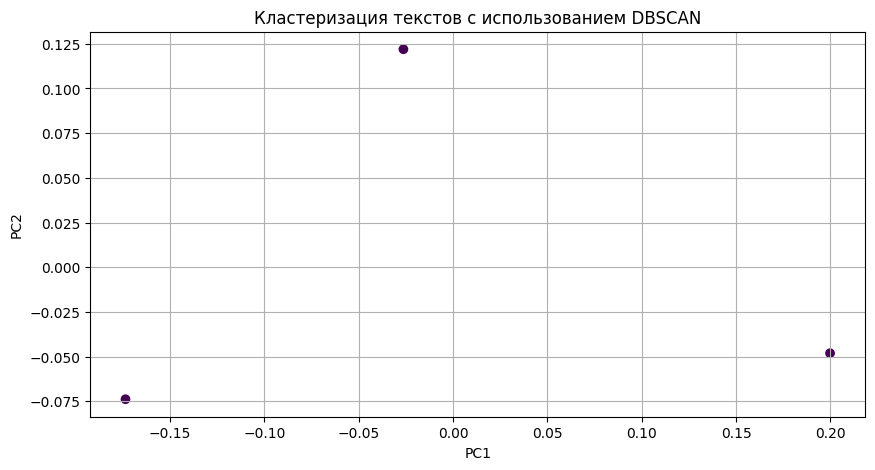

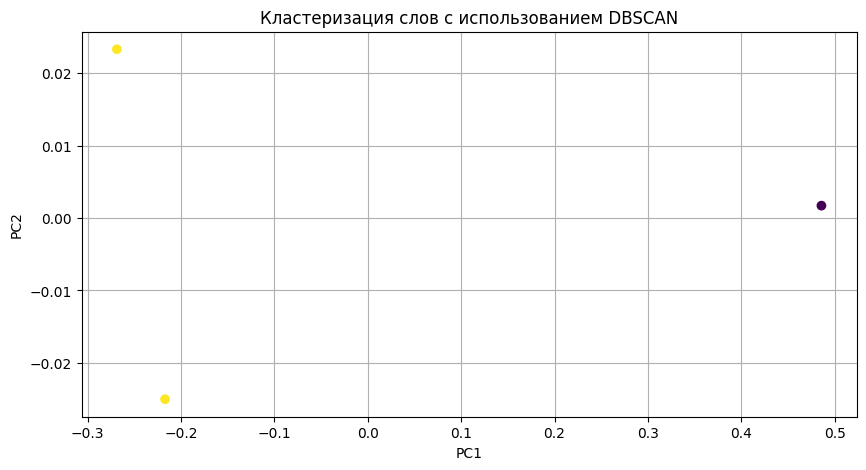

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

# Пример 1: Кластеризация текстов

# Векторы TF-IDF для трех текстов
tfidf_vectors = np.array([
    [0.2, 0.3, 0.5],  # Документ 1
    [0.1, 0.6, 0.3],  # Документ 2
    [0.3, 0.4, 0.3]   # Документ 3
])

# Применение DBSCAN
dbscan_texts = DBSCAN(eps=0.3, min_samples=2)
clusters_texts = dbscan_texts.fit_predict(tfidf_vectors)

# Визуализация кластеров текстов
pca_texts = PCA(n_components=2).fit_transform(tfidf_vectors)
plt.figure(figsize=(10, 5))
plt.scatter(pca_texts[:, 0], pca_texts[:, 1], c=clusters_texts, cmap='viridis', marker='o')
plt.title('Кластеризация текстов с использованием DBSCAN')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.show()


# Пример 2: Кластеризация слов

# Векторы эмбеддингов для трех слов
word_embeddings = np.array([
    [0.1, 0.2, 0.3],  # Слово 1 (кошка)
    [0.1, 0.25, 0.35],  # Слово 2 (кот)
    [0.6, 0.6, 0.7]   # Слово 3 (собака)
])

# Применение DBSCAN
dbscan_words = DBSCAN(eps=0.1, min_samples=2)
clusters_words = dbscan_words.fit_predict(word_embeddings)

# Визуализация кластеров слов
pca_words = PCA(n_components=2).fit_transform(word_embeddings)
plt.figure(figsize=(10, 5))
plt.scatter(pca_words[:, 0], pca_words[:, 1], c=clusters_words, cmap='viridis', marker='o')
plt.title('Кластеризация слов с использованием DBSCAN')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.show()


### Вопросы для самопроверки

1. Что такое DBSCAN и в чем его основные преимущества по сравнению с другими методами кластеризации?
2. Какие параметры используются в алгоритме DBSCAN и как они влияют на результаты кластеризации?
3. Объясните, как DBSCAN определяет, является ли точка «шумом».
4. Что такое "базовая точка" и "пограничная точка" в контексте DBSCAN?
5. Какова роль метрики расстояния в алгоритме DBSCAN? Приведите примеры.
6. В чем разница между Eps и MinPts в алгоритме DBSCAN?
7. Как DBSCAN справляется с кластерами различной плотности?
8. Объясните, как работает процесс расширения кластеров в DBSCAN.
9. Что происходит, если выбранный Eps слишком мал или слишком велик?
10. Как можно визуализировать результаты кластеризации с помощью DBSCAN?
11. Какие приложения существуют для DBSCAN в области обработки естественного языка (NLP)?
12. Как можно использовать PCA для визуализации высокоразмерных данных?
13. Каковы ограничения метода DBSCAN? В каких ситуациях он может давать неудачные результаты?
14. Почему DBSCAN не подходит для данных с сильно различающимися плотностями?
15. Объясните, как можно использовать DBSCAN для обнаружения аномалий в данных.

### Задачи для самостоятельной работы

#### Задачи по теории

1. Объясните, как алгоритм DBSCAN можно использовать для кластеризации временных рядов.
2. Исследуйте влияние различных значений Eps и MinPts на результаты кластеризации.
3. Сравните алгоритм DBSCAN с алгоритмом K-средних. В чем их ключевые различия?
4. Приведите примеры задач, для которых лучше всего подходит DBSCAN, и объясните, почему.
5. Как можно адаптировать DBSCAN для работы с категориальными данными?

#### Практические задачи

6. Используя случайные данные, проведите кластеризацию с использованием DBSCAN и визуализируйте результаты.
7. Создайте набор данных с двумя кластерами разной плотности и примените к ним DBSCAN. Проанализируйте результаты.
8. Сгенерируйте набор данных, включающий шум, и примените к ним DBSCAN, чтобы определить, как он обрабатывает шум.
9. Реализуйте DBSCAN на собственном наборе данных, используя библиотеку scikit-learn, и визуализируйте результаты.
10. Используйте метод кросс-валидации, чтобы оценить производительность DBSCAN на различных наборах данных.

#### Задачи по NLP

11. Соберите текстовые данные из различных источников и примените DBSCAN для кластеризации документов.
12. Сравните кластеризацию текстов, выполненную с использованием TF-IDF и word embeddings, с помощью DBSCAN.
13. Проведите анализ полученных кластеров текстов. Каковы их основные темы?
14. Используйте DBSCAN для обнаружения аномалий в текстах (например, спам или необычные паттерны).
15. Примените DBSCAN для кластеризации отзывов о товарах, используя подходы TF-IDF и LDA.

#### Задачи с использованием данных

16. Работая с набором данных о цветках Ирис, примените DBSCAN и сравните результаты с другими методами кластеризации.
17. Исследуйте, как меняется распределение кластеров при изменении Eps на реальных данных (например, набор данных о клиентах).
18. Создайте набор данных с использованием случайных точек и аномальных точек. Примените DBSCAN и проанализируйте результаты.
19. Постройте график зависимости количества кластеров от параметра Eps.
20. Проведите исследование зависимости качества кластеризации от различных методов нормализации данных.

#### Дополнительные задачи

21. Изучите, как DBSCAN можно использовать в сочетании с другими методами (например, PCA) для улучшения качества кластеризации.
22. Реализуйте функцию для автоматической настройки параметров Eps и MinPts на основе характеристик данных.
23. Сравните результаты кластеризации с помощью DBSCAN и другого алгоритма (например, K-средних) на одном и том же наборе данных.
24. Создайте визуализацию 3D для кластеров, созданных с использованием DBSCAN.
25. Используйте визуализацию для анализа кластеров, созданных с использованием различных алгоритмов кластеризации.
26. Изучите, как можно улучшить алгоритм DBSCAN для работы с большими наборами данных.
27. Проведите исследование кластеризации текстов, используя разные языковые модели (например, BERT, Word2Vec).
28. Проанализируйте и сравните время выполнения DBSCAN на различных объемах данных.
29. Реализуйте адаптивный подход к настройке Eps в зависимости от локальной плотности данных.
30. Исследуйте, как изменения в структуре данных влияют на результаты кластеризации DBSCAN.
